# **Predicting Loan Defaults using ML model.**






# 1. Data Collection: Selection and get data




In [ ]:
#Importing the libraries and dependencies required:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix

#from category_encoders import BinaryEncoder
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
seed = 42

Get the Data
Use pandas to read lending_club_loan.csv as a dataframe called loans

In [ ]:
#Loading and displaying the dataset:

df = pd.read_csv('/lending_club_loan_dataset2.csv')

# Feature description:
* **id:** Unique ID of the loan application.
* **grade:** LC assigned loan grade.
* **annual_inc:** The self-reported annual income provided by the borrower during registration.
* **short_emp:** 1 when employed for 1 year or less.
* **emp_length_num:** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership: Type of home ownership.
* **dti (Debt-To-Income Ratio):** A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
* **purpose:** A category provided by the borrower for the loan request.
* **term:** The number of payments on the loan. Values are in months and can be either 36 or 60.
* **last_delinq_none:** 1 when the borrower had at least one event of delinquency.
* **last_major_derog_none:** 1 borrower had at least 90 days of a bad rating.
* **revol_util:** Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* **total_rec_late_fee:** Late fees received to date.
* **od_ratio:** Overdraft ratio.
* **bad_loan:** 1 when a loan was not paid.

# 2. Data preparation

#  - Exploratory data analysis(EDA)

In [ ]:
df.info

<bound method DataFrame.info of              id grade  annual_inc  ...  total_rec_late_fee  od_ratio bad_loan
0      11454641     A    100000.0  ...                 0.0  0.160624      0.0
1       9604874     A     83000.0  ...                 0.0  0.810777      0.0
2       9684700     D     78000.0  ...                 0.0  0.035147      1.0
3       9695736     D     37536.0  ...                 0.0  0.534887      1.0
4       9795013     D     65000.0  ...                 0.0  0.166500      0.0
...         ...   ...         ...  ...                 ...       ...      ...
10962   8999869     B     42000.0  ...                 0.0  0.489752      0.0
10963   8970144     B    108000.0  ...                 0.0  0.419795      0.0
10964   8999744     C     60000.0  ...                 0.0  0.707074      0.0
10965   9010107     D    112000.0  ...                 0.0  0.476345      0.0
10966   9010060     C    103000.0  ...                 NaN       NaN      NaN

[10967 rows x 15 columns]>

 The dataset has 20000 rows and 15 columns .

In [ ]:
df.head(3)

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1.0,NaN,43.2,0.0,0.160624,0.0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0.0,NaN,21.5,0.0,0.810777,0.0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1.0,NaN,46.3,0.0,0.035147,1.0


In [ ]:
# Type of variables:
df.dtypes.sort_values(ascending=True)


id                         int64
short_emp                  int64
emp_length_num             int64
annual_inc               float64
dti                      float64
last_delinq_none         float64
last_major_derog_none    float64
revol_util               float64
total_rec_late_fee       float64
od_ratio                 float64
bad_loan                 float64
grade                     object
home_ownership            object
purpose                   object
term                      object
dtype: object

In [ ]:
# Couting variables by type:
df.dtypes.value_counts()

float64    8
object     4
int64      3
dtype: int64

The dataset has 20000 observations and 15 variables including the target, divided into 11 numeric and 4 categoric features.

In [ ]:
#Main stats of numeric attributes:

df.describe()


,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,1.096700e+04,10967.000000,10967.000000,10967.000000,10881.000000,10966.000000,309.000000,10966.000000,10966.000000,10966.000000,10966.000000
mean,8.440855e+06,73787.091183,0.112975,6.854564,16.720355,0.544775,0.741100,55.807160,0.269624,0.503672,0.189586
std,1.323761e+06,45960.638674,0.316577,3.784683,7.590030,0.498014,0.438741,52.698906,2.915568,0.288600,0.391991
min,5.962570e+05,9732.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.000000
25%,7.388333e+06,48000.000000,0.000000,3.000000,10.970000,0.000000,0.000000,38.500000,0.000000,0.254967,0.000000
50%,8.146697e+06,65000.000000,0.000000,7.000000,16.350000,1.000000,1.000000,56.700000,0.000000,0.507208,0.000000
75%,8.986201e+06,89000.000000,0.000000,11.000000,22.230000,1.000000,1.000000,73.100000,0.000000,0.754268,0.000000
max,1.145464e+07,1000000.000000,1.000000,11.000000,34.990000,1.000000,1.000000,5010.000000,87.520000,0.999894,1.000000


From the difference between the mean and the median, and also the distance of maximum values of the variables ‘annual_inc’, ‘revol_util’ and ‘total_rec_late_fee’, it seems there are some outliers.


In [ ]:
# Main stats of categoric attributes:

df.describe(include=[np.object])

,grade,home_ownership,purpose,term
count,10967,10153,10967,10967
unique,7,3,12,4
top,B,MORTGAGE,debt_consolidation,36 months
freq,3233,5447,6810,8089


In [ ]:
df.isnull().sum()

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership             814
dti                         86
purpose                      0
term                         0
last_delinq_none             1
last_major_derog_none    10658
revol_util                   1
total_rec_late_fee           1
od_ratio                     1
bad_loan                     1
dtype: int64

In [ ]:
data = pd.DataFrame(df)

In [ ]:
data.drop( "last_major_derog_none", axis=1 , inplace=True)

In [ ]:
# Checking for missing values:
nulval = data.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent %"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent %
id,0,0.00
grade,0,0.00
annual_inc,0,0.00
short_emp,0,0.00
emp_length_num,0,0.00
home_ownership,814,89.94
dti,86,9.50
purpose,0,0.00
term,0,0.00
last_delinq_none,1,0.11


There are variables with missing values: (home_ownership) with 7.46%, (dti) with 0.77%, and (last_major_derog_none) with 97.13%. ????

In [ ]:
# Checking data balance/proportion
loan = data.bad_loan.value_counts().to_frame().rename(columns={"bad_loan":"absolute"})
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))
display(loan)


,absolute,percent
0.0,8887,81.04
1.0,2079,18.96


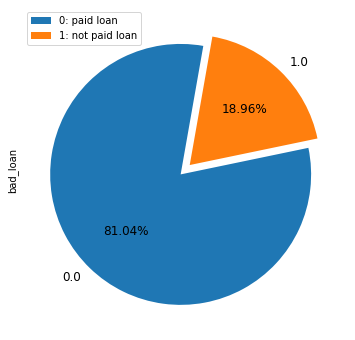

In [ ]:
# pie chart
data.bad_loan.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: paid loan","1: not paid loan"]);


data has 80% of default results (value 0) against 20% of loans (value 1)

In [ ]:
#Type of variables
data.dtypes.sort_values(ascending=True)

id                      int64
short_emp               int64
emp_length_num          int64
annual_inc            float64
dti                   float64
last_delinq_none      float64
revol_util            float64
total_rec_late_fee    float64
od_ratio              float64
bad_loan              float64
grade                  object
home_ownership         object
purpose                object
term                   object
dtype: object

In [ ]:
# Couting variables by type
data.dtypes.value_counts()

float64    7
object     4
int64      3
dtype: int64

In [ ]:
# Checking for missing values
nulval = data.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
id,0,0.00
grade,0,0.00
annual_inc,0,0.00
short_emp,0,0.00
emp_length_num,0,0.00
home_ownership,814,89.94
dti,86,9.50
purpose,0,0.00
term,0,0.00
last_delinq_none,1,0.11


##EDA functions

Describing all the features in the dataset using and abusing graphics. Start by defining a few functions for every chart: boxplot, histograms, bar and pie charts, scatterplots, pivot charts, as well as a statistic descriptions.

In [ ]:
# General statistics
def stats(x):
    print(f"Variable: {x}")
    print(f"Type of variable: {data[x].dtype}")
    print(f"Total observations: {data[x].shape[0]}")
    detect_null_val = data[x].isnull().values.any()
    if detect_null_val:
        print(f"Missing values: {data[x].isnull().sum()} ({(data[x].isnull().sum() / data[x].isnull().shape[0] *100).round(2)}%)")
    else:
        print(f"Missing values? {data[x].isnull().values.any()}")
    print(f"Unique values: {data[x].nunique()}")
    if data[x].dtype != "O":
        print(f"Min: {int(data[x].min())}")
        print(f"25%: {int(data[x].quantile(q=[.25]).iloc[-1])}")
        print(f"Median: {int(data[x].median())}")
        print(f"75%: {int(data[x].quantile(q=[.75]).iloc[-1])}")
        print(f"Max: {int(data[x].max())}")
        print(f"Mean: {data[x].mean()}")
        print(f"Std dev: {data[x].std()}")
        print(f"Variance: {data[x].var()}")
        print(f"Skewness: {scipy.stats.skew(data[x])}")
        print(f"Kurtosis: {scipy.stats.kurtosis(data[x])}")
        print("")
        
        # Percentiles 1%, 5%, 95% and 99%
        print("Percentiles 1%, 5%, 95%, 99%")
        display(data[x].quantile(q=[.01, .05, .95, .99]))
        print("")
    else:
        print(f"List of unique values: {data[x].unique()}")

In [ ]:
# Variable vs. target chart
def target(x):
    short_0 = data[data.bad_loan == 0].loc[:,x]
    short_1 = data[data.bad_loan == 1].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='Not-default', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Default', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

In [ ]:
#Boxplot + Hist chart
def boxhist(x):
    variable = data[x]
    np.array(variable).mean()
    np.median(variable)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
    mean=np.array(variable).mean()
    median=np.median(variable)
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    plt.title(x, fontsize=10, loc="right")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()


In [ ]:
# Histogram
def hist(x):
    plt.hist(data[x], bins=25)
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

In [ ]:
# Pie chart
def pie(x):
    data[x].value_counts(dropna=False).plot(kind='pie', figsize=(6,5), fontsize=10, autopct='%1.1f%%', startangle=0, legend=True, textprops={'color':"white", 'weight':'bold'});
# Number of observations by class
    obs = data[x].value_counts(dropna=False)
    o = pd.DataFrame(obs)
    o.rename(columns={x:"Freq abs"}, inplace=True)
    o_pc = (data[x].value_counts(normalize=True) * 100).round(2)
    obs_pc = pd.DataFrame(o_pc)
    obs_pc.rename(columns={x:"percent %"}, inplace=True)
    obs = pd.concat([o,obs_pc], axis=1)
    display(obs)

In [ ]:
# Variable vs. target chart
def target(x):
    short_0 = data[data.bad_loan == 0].loc[:,x]
    short_1 = data[data.bad_loan == 1].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='Not-default', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Default', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

In [ ]:
# Boxplot + Hist chart
def boxhist(x):
    variable = data[x]
    np.array(variable).mean()
    np.median(variable)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
    mean=np.array(variable).mean()
    median=np.median(variable)
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    plt.title(x, fontsize=10, loc="right")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()

In [ ]:
# Bar chart
def bar(x):
    ax = data[x].value_counts().plot(kind="bar", figsize=(6,5), fontsize=10, color=sns.color_palette("rocket"), table=False)
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.xlabel(x, fontsize=10)
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.ylabel("Absolute values", fontsize=10)
    plt.title(x, fontsize=10, loc="right")

In [ ]:
# Barh chart
def barh(x):
    data[x].value_counts().plot(kind="barh", figsize=(6,5), fontsize=10, color=sns.color_palette("rocket"), table=False)
    plt.xlabel("Absolute values", fontsize=10)
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.ylabel(x, fontsize=10)
    plt.title(x, fontsize=10, loc="right")

In [ ]:
# Pivot_table_mean
def pivot_mean(a, b, c):
    type_pivot_mean = data.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.mean)
    display(type_pivot_mean)
# Display pivot_table
    type_pivot_mean.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);
# Pivot_table_sum
def pivot_sum(a, b, c):
    type_pivot_sum = data.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.sum)
    display(type_pivot_sum)
# Display pivot_table
    type_pivot_sum.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);


In [ ]:
# Scatter plot
#def scatter(x, y):
#    targets = data["bad_loan"].unique()
 #   for target in targets:
  #      a = data[data["bad_loan"] == target][x]
   #     b = data[data["bad_loan"] == target][y]
    #plt.scatter(a, b, label=f"bad loan: {target}", marker="*")
    #plt.xlabel(x, fontsize=10)
    #plt.ylabel(y, fontsize=10)
    #plt.title("abc", fontsize=10, loc="right")
    #plt.legend()
    #plt.show()

### Visualization of the numeric distribution

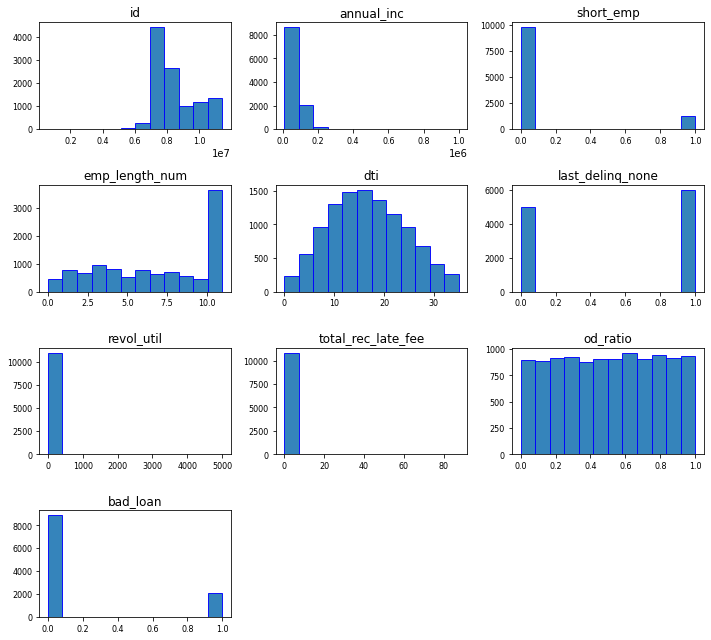

In [ ]:
data.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

### Visualization of the categoric distribution

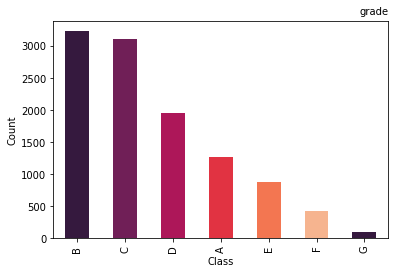

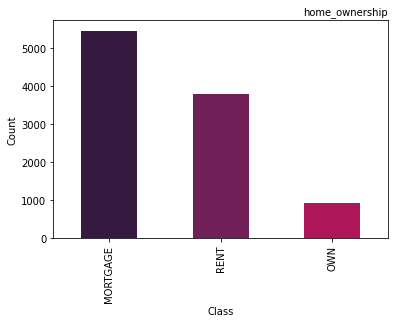

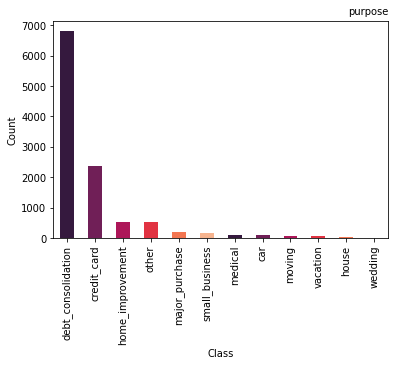

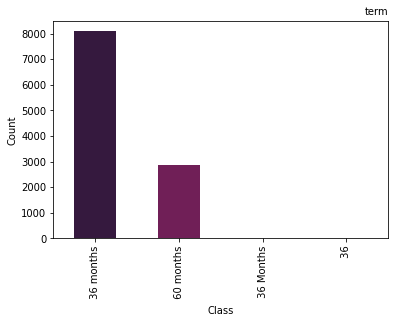

In [ ]:
for col in data.select_dtypes(include=["object"]).columns:
    data[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))
    
    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    plt.show()

In [ ]:
#It seems there is a typo in the ’36 Months’ class on the variable ‘term’. Let’s fix it by lowering the capitalized characters
data.term = data.term.str.lower()
data.term.value_counts()

 36 months    8109
 60 months    2857
 36              1
Name: term, dtype: int64

###Feature: grade
#####LC assigned loan grade.

In [ ]:
stats("grade")

Variable: grade
Type of variable: object
Total observations: 10967
Missing values? False
Unique values: 7
List of unique values: ['A' 'D' 'E' 'B' 'G' 'C' 'F']


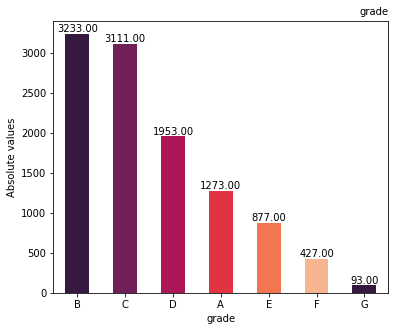

In [ ]:
bar("grade")

home_ownership,MORTGAGE,OWN,RENT
grade,,,
A,6436382507,833229326,2736205454
B,14553767406,2076828539,8458088579
C,12891245084,2231761333,9279265361
D,7152927730,1471020730,6535730817
E,3346655475,712837495,2959456175
F,1368170166,453534756,1487802741
G,298338789,60100208,360184159


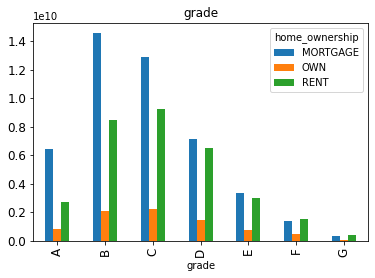

In [ ]:
pivot_sum("home_ownership","grade","id")

When the grade classes decrease, the type of homeownership tends to shift from mortgage to rent. It is on grades B, C, and D that we see the type of own propriety as the highest class.

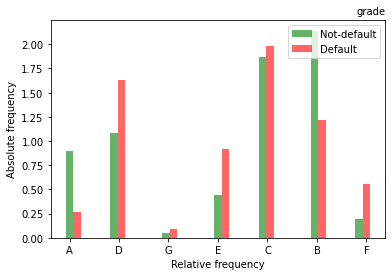

In [ ]:
target("grade")

It is between the upper-grade classes that the highest not-default loans happen.

### Feature: annual_inc
#### The self-reported annual income provided by the borrower during registration.

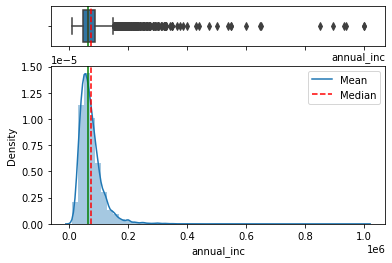

In [ ]:
boxhist("annual_inc")

In [ ]:
stats("annual_inc")

Variable: annual_inc
Type of variable: float64
Total observations: 10967
Missing values? False
Unique values: 1615
Min: 9732
25%: 48000
Median: 65000
75%: 89000
Max: 1000000
Mean: 73787.09118263883
Std dev: 45960.638674225884
Variance: 2112380307.3427477
Skewness: 5.938663114591386
Kurtosis: 83.1599672007673

Percentiles 1%, 5%, 95%, 99%


0.01     21000.0
0.05     30000.0
0.95    145000.0
0.99    225000.0
Name: annual_inc, dtype: float64

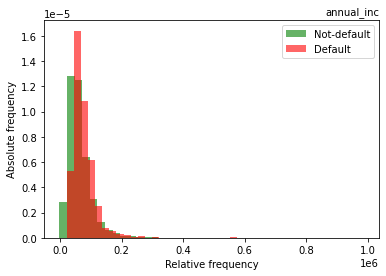

In [ ]:
target("annual_inc")

The histogram tells us that the higher the income, the higher is the trend of default.


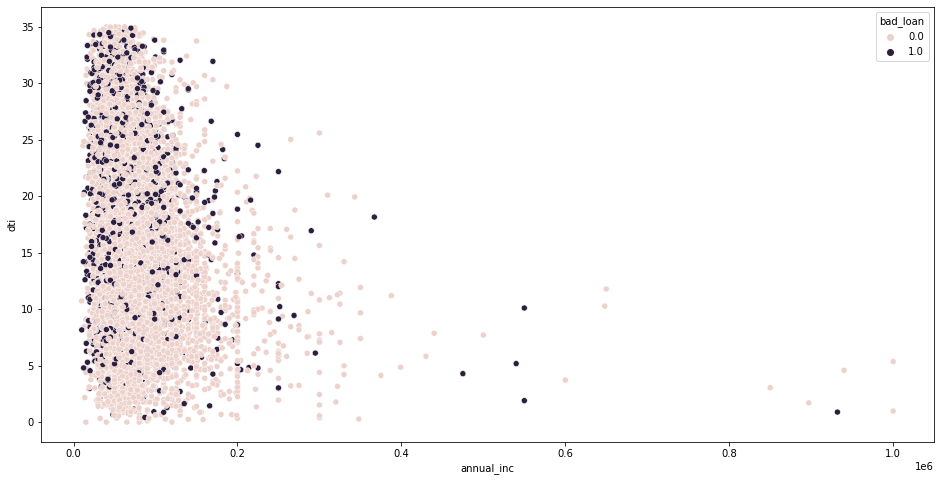

In [ ]:
data_scat = data[['dti', 'annual_inc', 'bad_loan']].copy()
plt.figure(figsize = (16,8))
sns.scatterplot(data = data_scat, x = 'annual_inc', y = 'dti', hue = 'bad_loan')
plt.show()

The scatterplot shows a weak and negative association between ‘annual income’ and ‘debt to income ratio’.

The correlation value is of -0.23 meaning as the annual_inc decreases, the loans at instance 1 (default/ not paid) increases.

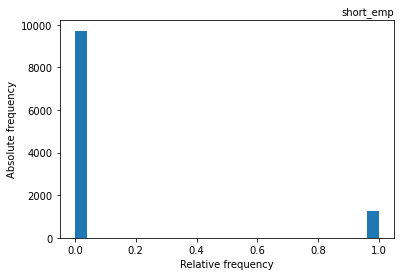

In [ ]:
hist("short_emp")

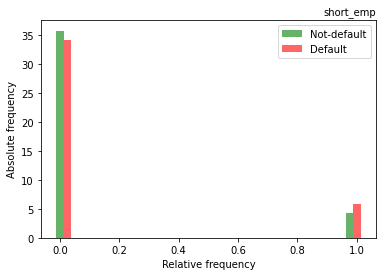

In [ ]:
target("short_emp")

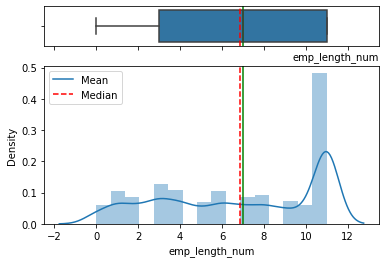

In [ ]:
boxhist("emp_length_num")

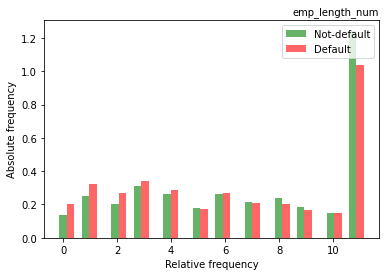

In [ ]:
target("emp_length_num")

bad_loan,0.0,1.0
purpose,,
car,5.878378,4.866667
credit_card,6.721436,6.141388
debt_consolidation,7.115895,6.437883
home_improvement,7.146067,6.489796
house,6.023810,1.333333
major_purchase,6.208589,6.088889
medical,6.768116,6.346154
moving,6.240741,2.800000
other,6.950495,6.445378


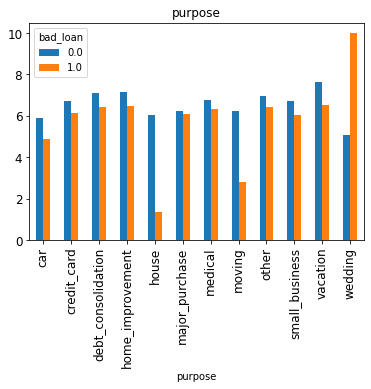

In [ ]:
pivot_mean("bad_loan", "purpose", "emp_length_num")

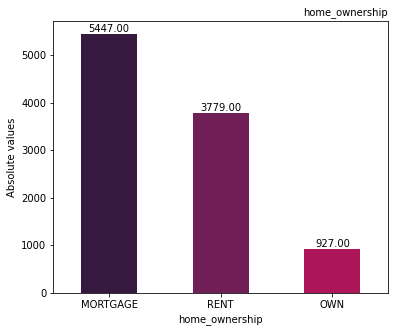

In [ ]:
bar("home_ownership")

,Freq abs,percent %
MORTGAGE,5447,53.65
RENT,3779,37.22
OWN,927,9.13
NaN,814,NaN


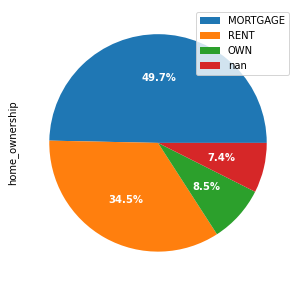

In [ ]:
pie("home_ownership")

bad_loan,0.0,1.0
home_ownership,,
MORTGAGE,38367440054,7680047103
OWN,6367417337,1471895050
RENT,24718539094,7098194192


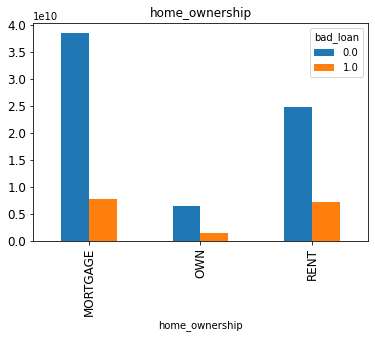

In [ ]:
pivot_sum("bad_loan", "home_ownership", "id")

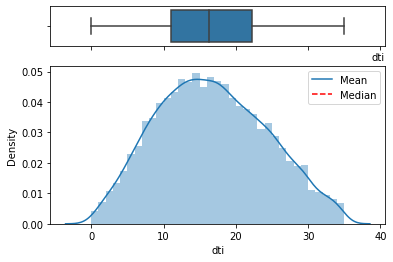

In [ ]:
boxhist("dti")

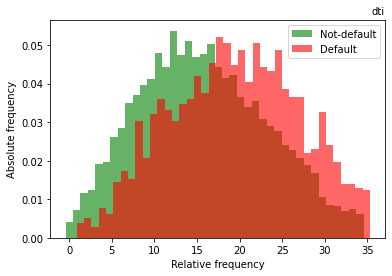

In [ ]:
target("dti")


home_ownership,MORTGAGE,OWN,RENT
purpose,,,
car,475.68,192.18,454.52
credit_card,19831.74,3179.90,14007.49
debt_consolidation,57996.22,9108.05,40549.94
home_improvement,5284.54,1014.29,444.82
house,183.51,55.47,314.21
major_purchase,1083.55,289.70,1380.83
medical,546.13,101.66,592.50
moving,164.50,88.18,578.68
other,3168.48,1090.02,3271.04


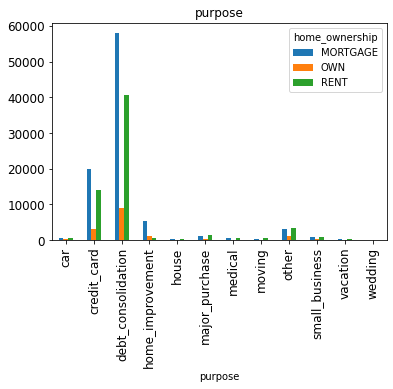

In [ ]:
pivot_sum("home_ownership", "purpose", "dti")

bad_loan,0.0,1.0
grade,,
A,17306.93,1434.17
B,44828.74,6914.09
C,41355.89,11799.93
D,24173.83,9609.42
E,9963.20,5478.42
F,4063.68,3410.69
G,1061.97,520.20


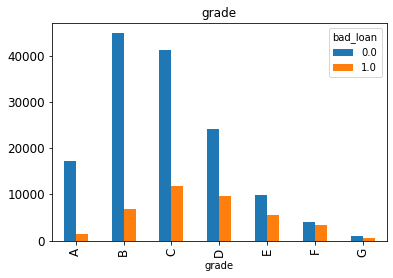

In [ ]:
pivot_sum("bad_loan", "grade", "dti")

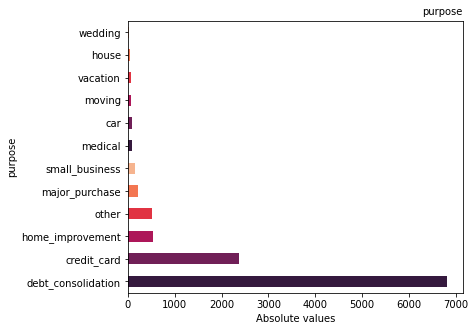

In [ ]:
barh("purpose")

bad_loan,0.0,1.0
purpose,,
car,643685397,120593264
credit_card,16725661581,3243480280
debt_consolidation,46462218344,11024027274
home_improvement,3759090074,813063117
house,347508977,24741111
major_purchase,1352887601,393546211
medical,628519319,227694682
moving,456595453,83864625
other,3430617112,981032048


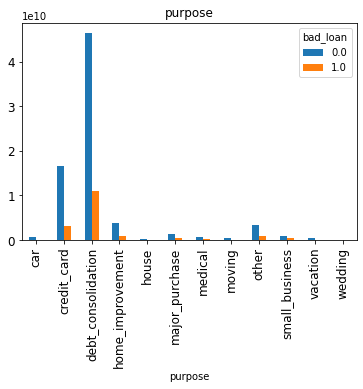

In [ ]:
pivot_sum("bad_loan", "purpose", "id")